---
当自变量和因变量的个数都很多，且都存在多重相关性，而观测数据的数量又较少时，偏最小二乘回归建立的模型具有独特的优点
#### 体能训练数据回归建模

In [1]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from scipy.stats import zscore
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [2]:
data = np.loadtxt('../../13第13章  偏最小二乘回归分析/data13_1.txt')
N = data.shape[0]
mu = data.mean(axis=0)
sig = data.std(axis=0, ddof=1)
R = np.corrcoef(data.T)
std_data = zscore(data, ddof=1)
X_std = std_data[:, :3]
Y_std = std_data[:, 3:]
n = X_std.shape[1]
m = Y_std.shape[1]
RMSE = []
for i in range(1, n+1):
    pls = PLSRegression(i)
    y_cv = cross_val_predict(pls, X_std, Y_std)
    RMSE.append(mean_squared_error(Y_std, y_cv))
RMSE

[1.0510364655087698, 1.226654756077784, 1.3432579707543988]

建议使用1个成分，但下面使用2个成分

In [3]:
md = PLSRegression(2).fit(X_std, Y_std)
x_score = md.x_scores_
y_score = md.y_scores_
x_coef = np.linalg.pinv(X_std) @ x_score # 自变量的成分系数
y_coef = np.linalg.pinv(Y_std) @ y_score # 因变量的成分系数
print(x_coef, "\n\n", y_coef)   # 每列为一个成分

[[ 0.58989082 -0.36795837]
 [ 0.77134081  0.69990868]
 [-0.23887693  0.63558684]] 

 [[-1.10103073 -1.38088594]
 [-1.34098948 -0.20064381]
 [-0.4608101  -0.94164042]]


In [4]:
x_rcoef = md.x_loadings_    # 自变量对主成分的回归系数
y_rcoef = md.y_loadings_    # 因变量对主成分的回归系数
print(x_rcoef, "\n\n", y_rcoef)

[[ 0.66591531  0.01976472]
 [ 0.67602366  0.35471175]
 [-0.35892139  1.19418263]] 

 [[-0.34163079 -0.33638156]
 [-0.41608584 -0.29078321]
 [-0.1429814  -0.0651935 ]]


In [5]:
beta2 = md.coef_    # 标准 y对标准 x的回归系数(每列)
print(beta2)

[[-0.07775045 -0.1384491  -0.06035492]
 [-0.49895014 -0.52446567 -0.15591689]
 [-0.13219198 -0.08542467 -0.00728117]]


In [6]:
beta3 = np.zeros((n+1, m))
beta3[0] = mu[n:] - mu[:n]/sig[:n] @ beta2 * sig[n:]
for i in range(m):
    beta3[1:, i] = sig[n+i]/sig[:n] * beta2[:, i]
print(beta3)    # 原始 y对原始 x的回归系数（每列，第一行为截距）

[[ 4.70204278e+01  6.12574937e+02  1.83982095e+02]
 [-1.66465010e-02 -3.50834694e-01 -1.25345659e-01]
 [-8.23738730e-01 -1.02480627e+01 -2.49690528e+00]
 [-9.69164303e-02 -7.41255618e-01 -5.17809795e-02]]


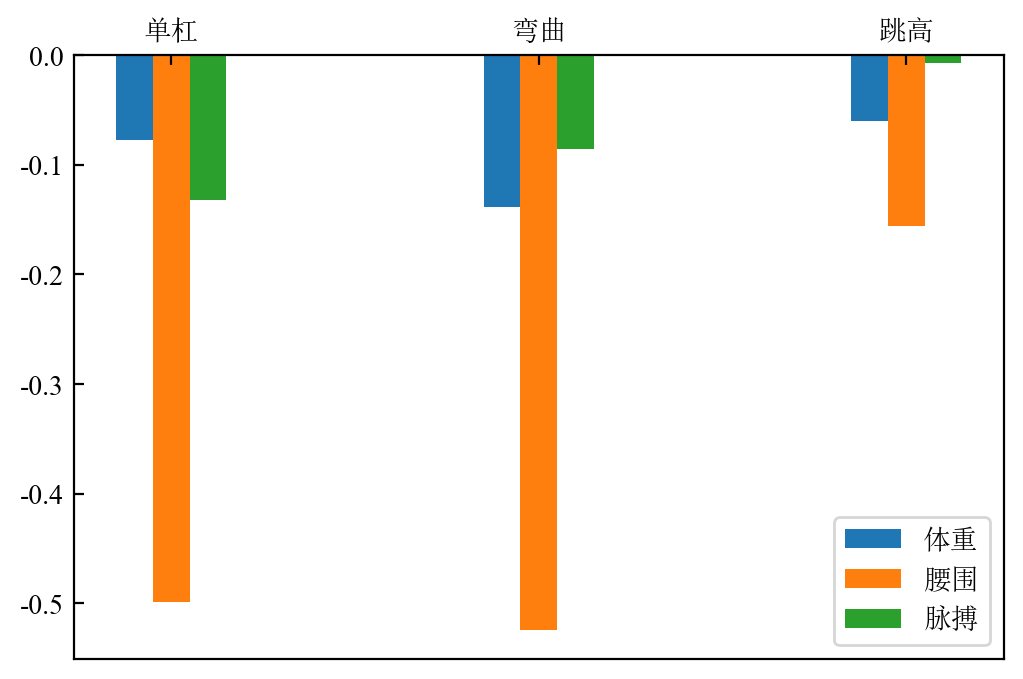

In [7]:
x0 = np.arange(1, 4)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x0, beta2[0, :], 0.1, label="体重")
ax.bar(x0+0.1, beta2[1, :], 0.1, label="腰围")
ax.bar(x0+0.2, beta2[2, :], 0.1, label="脉搏")
ax.set_xticks(x0+0.1, labels=["单杠", "弯曲", "跳高"])
ax.xaxis.tick_top() 
ax.legend()
fig.show()

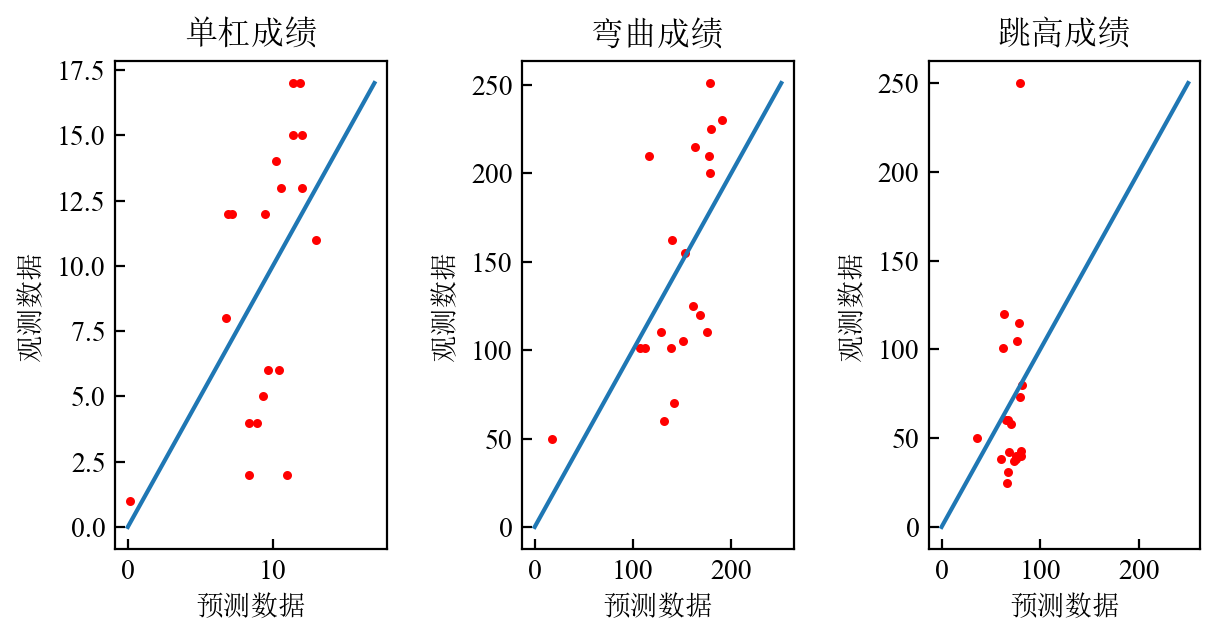

In [8]:
X0 = data[:, :3]
Y0 = data[:, 3:]
X01 = np.hstack([np.ones((len(X0), 1)), X0])
yhat = X01 @ beta3
maxY0 = np.max(Y0, axis=0)

fig = plt.figure(figsize=(7, 6))
def drawPred(ax, ind):
    ax.plot([0, maxY0[ind]], [0, maxY0[ind]])
    ax.scatter(yhat[:, ind], Y0[:, ind], s=5, color='r')
    ax.set_box_aspect(1.8)
    ax.set_xlabel("预测数据")
    ax.set_ylabel("观测数据")
    ax.set_title(titles[ind])
ax = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)
titles = ["单杠成绩", "弯曲成绩", "跳高成绩"]
drawPred(ax, 0)
drawPred(ax1, 1)
drawPred(ax2, 2)
fig.subplots_adjust(wspace=0.5)

#### 交通业和旅游业的回归分析

In [9]:
data = np.loadtxt("../../13第13章  偏最小二乘回归分析/data13_2.txt")
mu = data.mean(axis=0)
sig = data.std(axis=0, ddof=1)
R = np.corrcoef(data.T)
data_std = zscore(data, ddof=1)
X = data_std[:, :7]
Y = data_std[:, 7:]
n = X.shape[1]
m = Y.shape[1]
MSE = []
for i in range(1, n+1):
    pls = PLSRegression(i)
    y_cv = cross_val_predict(pls, X, Y)
    MSE.append(mean_squared_error(Y, y_cv))
MSE

[1.3817678847232744,
 0.9460647060618946,
 1.1571480279879913,
 1.0474965772422478,
 2.056892281322173,
 2.3722581597966372,
 3.204406617154469]

建议使用两个成分

In [10]:
md = PLSRegression(2).fit(X, Y)
coef = md.coef_    # 标准 y对标准 x的回归系数(每列)
print(coef)

[[ 0.01032155 -0.2845245  -0.64184011  0.00342245]
 [-0.10191343 -0.46476058 -1.14269303 -0.12111542]
 [-0.00341803 -0.31449316 -0.72121239 -0.01203404]
 [ 0.25589468  0.1644452   0.57879911  0.27737107]
 [ 0.34036319  0.30641679  0.97019374  0.37126748]
 [ 0.27856259  0.18848473  0.65171196  0.30219406]
 [ 0.1607601  -0.02616608  0.0678153   0.17079898]]


In [11]:
coef0 = np.zeros((n+1, m))
coef0[0] = mu[n:] - mu[:n]/sig[:n] @ coef * sig[n:]
for i in range(m):
    coef0[1:, i] = sig[n+i]/sig[:n] * coef[:, i]
print(coef0)    # 原始 y对原始 x的回归系数（每列，第一行为截距）

[[ 7.94240978e+04  1.29895513e+08  2.10767584e+04 -7.67986506e+02]
 [ 2.17878837e-02 -5.41458151e+03 -2.46549932e-01  2.60754565e-03]
 [-1.35596188e-02 -5.57468512e+02 -2.76664502e-02 -5.81620726e-03]
 [-1.38740188e-02 -1.15083286e+04 -5.32717597e-01 -1.76303924e-02]
 [ 2.53765504e+00  1.47016991e+04  1.04449653e+00  9.92788833e-01]
 [ 1.36378376e+03  1.10685442e+07  7.07406785e+02  5.36925754e+02]
 [ 3.66951515e+01  2.23839681e+05  1.56224593e+01  1.43679964e+01]
 [ 1.15740670e+00 -1.69832758e+03  8.88470958e-02  4.43830754e-01]]
